¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd# Cargar todas las librerías
import seaborn as sns
import numpy as np
import math as mt
from scipy import stats as st
import scipy.integrate # necesario para ejecutar scipy
from math import factorial
from matplotlib import pyplot as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
print(df_calls)
print()

df_internet = pd.read_csv('/datasets/megaline_internet.csv')
print(df_internet)
print()

df_messages = pd.read_csv('/datasets/megaline_messages.csv')
print(df_messages)
print()

df_plans = pd.read_csv('/datasets/megaline_plans.csv')
print(df_plans)
print()

df_users = pd.read_csv('/datasets/megaline_users.csv')
print(df_users)

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.sample(2)

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este data frame, se muestra las caracteristicas de los planes surf y ultimate: minutos, mensajes y mb incluidos, el costo normal, los costos extra en caso de sobrepasarse los minutos, mensajes o gb incluidos. Los datos se encuentran completos y la muestra indica que los tipos de datos son acordes a la información existente, no se observa ningún problema a corregir.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]
En este data frame, los datos se encuentran completos y la muestra indica que los tipos de datos son acordes a la información existente, no se observa ningún problema a corregir.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [5]:
df_plans["gb_per_month_included"] = df_plans["mb_per_month_included"] /1000
df_plans.sample(2)

messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
1               70           7             0.01            0.01  ultimate   
0               20          10             0.03            0.03      surf   

   gb_per_month_included  
1                  30.72  
0                  15.36

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
df_users.sample(10)
print()
print(df_users["churn_date"].value_counts())


2018-12-18    3
2018-12-19    2
2018-12-31    2
2018-11-14    2
2018-11-24    1
2018-10-22    1
2018-08-16    1
2018-11-30    1
2018-11-18    1
2018-12-22    1
2018-08-19    1
2018-11-11    1
2018-07-31    1
2018-12-12    1
2018-10-07    1
2018-12-26    1
2018-09-01    1
2018-11-21    1
2018-12-15    1
2018-12-27    1
2018-09-17    1
2018-12-30    1
2018-09-18    1
2018-10-13    1
2018-11-29    1
2018-10-03    1
2018-12-10    1
2018-09-07    1
2018-11-16    1
Name: churn_date, dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este dataframe se muestra la información de 500 usuarios, todas las columnas se encuentran completas excepto churn_date que es la fecha de salida del plan, por lo que los demas usuarios siguen activos. Los datos existentes son identificación de usuario, nombre, apellido, edad, ciudad y estado, fecha de registro, tipo de plan y fecha de salida.
34 usuarios se dieron de baja durante el año que representan 6.8% de todos los usuarios registrados.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buena conclusión, pero a manera de complementar el análisis qué podríamos decir de los registros que no tienen valores en la variable churn_date? Por ejemplo, podrías usar value_counts() para ver en que fechas exactamente terminaron sus planes las 34 personas. 
</div>

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]
Se corrigen los el tipo de datos de registro y salida, estos deben convertirse en datos tipo datetime

In [8]:
df_users["reg_date"]= pd.to_datetime(df_users["reg_date"], format='%Y-%m-%d')
df_users["churn_date"]= pd.to_datetime(df_users["churn_date"], format='%Y-%m-%d')
df_users.info()
print()
print("El número de datos duplicados de df_users es ", df_users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

El número de datos duplicados de df_users es  0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
Se crea una columna que extrae los meses de la fecha de registro
Se crea una columna que extrae los meses de la fecha de salida

In [9]:
#se crea una columna que extrae los meses de la fecha de registro
df_users["reg_month"] = df_users["reg_date"].dt.month

#se crea una columna que extrae los meses de la fecha de salida
df_users["churn_month"] = df_users["churn_date"].dt.month
df_users["churn_month"] = df_users["churn_month"].fillna(0)

df_users.info()
df_users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   reg_month    500 non-null    int64         
 9   churn_month  500 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


user_id first_name  last_name  age  \
284     1284       Yuri       Odom   51   
413     1413      Andre    Hensley   38   
35      1035       Jeff   Cummings   67   
6       1006     Jesusa   Bradford   73   
425     1425   Latrisha     Larsen   19   
1       1001     Mickey  Wilkerson   28   
275     1275      Elvie  Velazquez   33   
385     1385     Nohemi   Erickson   52   
133     1133      Larry       Barr   50   
193     1193   Lacresha      Olsen   18   

                                          city   reg_date      plan  \
284                   Dayton-Kettering, OH MSA 2018-09-07      surf   
413                        Bakersfield, CA MSA 2018-07-12      surf   
35       Charlotte-Concord-Gastonia, NC-SC MSA 2018-12-08      surf   
6       San Francisco-Oakland-Berkeley, CA MSA 2018-11-27  ultimate   
425       Las Vegas-Henderson-Paradise, NV MSA 2018-09-20      surf   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
275  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-11-29  ultimate   
385  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-01-19      surf   
133                   Cincinnati, OH-KY-IN MSA 2018-07-21  ultimate   
193   Houston-The Woodlands-Sugar Land, TX MSA 2018-07-07      surf   

    churn_date  reg_month  churn_month  
284        NaT          9          0.0  
413        NaT          7          0.0  
35         NaT         12          0.0  
6   2018-12-18         11         12.0  
425        NaT          9          0.0  
1          NaT          8          0.0  
275        NaT         11          0.0  
385        NaT          1          0.0  
133        NaT          7          0.0  
193        NaT          7          0.0

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)

id  user_id   call_date  duration
127270    1456_23     1456  2018-10-21      0.00
68163    1246_182     1246  2018-09-04      2.87
100225    1359_88     1359  2018-03-16      6.61
35509   1132_1034     1132  2018-08-08      8.09
98298      1353_5     1353  2018-11-24      7.14
54952    1196_850     1196  2018-02-18      3.33
12215    1053_483     1053  2018-11-12      1.20
104185   1366_394     1366  2018-09-15      0.00
7569     1036_161     1036  2018-09-09      0.51
95602    1338_431     1338  2018-12-09     15.43

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Este data frame describe cada llamada realizada por los usuarios, contiene la user_id, la fecha de llamada y la duración de llamada

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Se corrige el tipo de dato de la fecha de llamada a tipo datetime

In [12]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"], format='%Y-%m-%d')

df_calls.info()
print()
print("El número de datos duplicados de df_calls es ", df_calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

El número de datos duplicados de df_calls es  0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Se crea una columna con el mes de la llamada

In [13]:
df_calls["month"] = df_calls["call_date"].dt.month
df_calls["duration_mins"] = df_calls["duration"].apply(np.ceil)

df_calls.info()
df_calls.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   month          137735 non-null  int64         
 5   duration_mins  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB


id  user_id  call_date  duration  month  duration_mins
136681   1495_120     1495 2018-09-30      3.64      9            4.0
47621    1172_212     1172 2018-08-24      1.10      8            2.0
129739   1466_191     1466 2018-07-30      6.90      7            7.0
109370   1385_440     1385 2018-10-22      5.19     10            6.0
31673    1119_647     1119 2018-12-15      3.82     12            4.0
63814     1232_37     1232 2018-09-24      4.46      9            5.0
3715     1014_443     1014 2018-12-15      0.00     12            0.0
53139    1191_287     1191 2018-05-19      2.16      5            3.0
15783     1062_23     1062 2018-09-01      0.00      9            0.0
102718   1364_319     1364 2018-08-28      3.95      8            4.0
11904    1052_123     1052 2018-12-04      8.32     12            9.0
6494     1031_101     1031 2018-12-09      6.62     12            7.0
89079   1324_1145     1324 2018-05-27      5.12      5            6.0
29913    1113_116     1113 2018-10-02      0.00     10            0.0
1860     1009_282     1009 2018-07-25      1.05      7            2.0
85351    1313_331     1313 2018-12-24      5.46     12            6.0
70577    1251_588     1251 2018-11-14      7.43     11            8.0
132089     1476_8     1476 2018-11-24      1.84     11            2.0
25443    1098_117     1098 2018-09-13      0.00      9            0.0
83717    1305_148     1305 2018-11-05      6.81     11            7.0

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

Las llamadas con duración cero serían llamadas no atendidas

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que es necesario redondear la duración de las llamadas  hacia arriba lo valores, dado que para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.
</div>

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)

id  user_id message_date
47531  1324_246     1324   2018-10-18
66187  1433_127     1433   2018-11-07
18762   1121_89     1121   2018-12-29
6497     1056_7     1056   2018-10-26
38748  1254_344     1254   2018-08-23
75196  1489_271     1489   2018-09-27
48779  1326_316     1326   2018-08-26
60913  1383_182     1383   2018-11-06
48147  1324_878     1324   2018-12-16
45589   1312_73     1312   2018-03-15

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este data frame, se describe la información de los mensjaes enviados, contiene la user_id y la fecha del mensaje 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Se transforma message_date de object a datetime

In [16]:
df_messages["message_date"]= pd.to_datetime(df_messages["message_date"], format='%Y-%m-%d')
df_messages.info()
print()
print("El número de datos duplicados de df_messages es ", df_messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

El número de datos duplicados de df_messages es  0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Se crea la columna month que contiene el mes de envío del mensaje

In [17]:
df_messages["month"]=df_messages["message_date"].dt.month
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)

id  user_id session_date  mb_used
53958   1244_76     1244   2018-12-03   144.41
99485  1468_318     1468   2018-10-21   261.04
47654   1214_28     1214   2018-02-01   314.40
63383   1292_87     1292   2018-11-01   820.57
84113   1392_81     1392   2018-08-08   333.41
2376   1011_116     1011   2018-08-23   470.33
48669    1217_9     1217   2018-11-19   595.20
29089   1133_42     1133   2018-11-05   379.84
63944  1293_417     1293   2018-11-30   592.45
12847  1061_344     1061   2018-07-04   198.80

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este dataframe, se desribe el uso de internet de cada uno de los usuarios; contiene la user_id, la fecha de sesión y los mb usados en la sesión

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]
Se transforma session_date de object a datetime

In [20]:
df_internet["session_date"]= pd.to_datetime(df_internet["session_date"], format='%Y-%m-%d')
df_internet.info()
print()
print("El número de datos duplicados de df_internet es ", df_internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

El número de datos duplicados de df_internet es  0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Se crea una columna del mes de la sesión

In [21]:
df_internet["month"]=df_internet["session_date"].dt.month
df_internet["gb_used"] = (df_internet["mb_used"] / 1000).round(2)
df_internet.info()
df_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ MB


id  user_id session_date  mb_used  month  gb_used
28981  1132_450     1132   2018-05-03   446.78      5     0.45
39361  1176_182     1176   2018-12-07   801.97     12     0.80
17110  1077_230     1077   2018-12-18   325.11     12     0.33
68093   1317_29     1317   2018-12-18   797.94     12     0.80
12909  1061_406     1061   2018-12-23  1105.40     12     1.11

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, un paso que es muy importate realizar es verificar que no se tengan duplicados en nuestras bases de datos y en caso de tener duplicados entender si hace sentido su duplicación o solamente son errores de registro. En este sentido sería importante que para todas las bases de datos desarrolles un análisis de registros duplicados.
    
</div>



## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                  15.36  
1                  30.72  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

Se crea un tabla pivot donde se cuenta el número de llamadas realizadas por cada usuario por cada mes. Los datos vacíos se rellenan con 0.

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
pivot_calls = df_calls.pivot_table(index=['user_id','month'],
                                   values=['duration'], 
                            aggfunc=['count'] 
                            ).reset_index()
pivot_calls = pivot_calls.fillna(0)
pivot_calls.sample(10)

user_id month    count
                   duration
225     1054     6       32
732     1156    12       48
1723    1380     9       59
2246    1498     5       35
546     1117    11       58
1689    1369    11       22
1698    1372    12       57
982     1211    12       36
791     1170    10      116
1634    1360    12      104

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! la función de pivot_table() es muy recomendable para hacer los códigos más eficientes. Solamente te recomendaria que puedes agregar las siguientes varaibles a la función para que se vean más claros los resultados: 
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()


    
</div>

In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Se crea un tabla pivot donde se suma el tiempo de llamadas realizadas por cada usuario por cada mes. Los datos vacíos se rellenan con 0.
pivot_mins = df_calls.pivot_table(index=['user_id', 'month'],
                            values=['duration_mins'], 
                            aggfunc=['sum'] 
                            ).reset_index()
pivot_mins = pivot_mins.fillna(0)
pivot_mins.sample(10)


user_id month           sum
                   duration_mins
792     1170    11         712.0
499     1107    12         320.0
1572    1347     9         490.0
2165    1477    11         339.0
955     1203    10         670.0
877     1187     7         565.0
1141    1249     8         554.0
542     1117     7         446.0
2072    1456    12         425.0
1716    1377     8         476.0

In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Se crea un tabla pivot donde se cuenta los mensajes enviados por cada usuario por cada mes. Los datos vacíos se rellenan con 0.

pivot_messages = df_messages.pivot_table(index=['user_id', 'month'],
                            values=['message_date'], 
                            aggfunc=['count'] 
                            ).reset_index()
pivot_messages = pivot_messages.fillna(0)
pivot_messages.sample(10)


user_id month        count
                   message_date
1743    1475    11           77
1725    1471    10           32
1638    1447    11           68
945     1252     8           26
1580    1433    11          123
642     1174     7           75
826     1220    10           35
907     1245    12            9
538     1144     8           86
1264    1339    12           86

In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Se crea un tabla pivot donde se suma los mb usados por cada usuario por cada mes. Los datos vacíos se rellenan con 0.

pivot_internet = df_internet.pivot_table(index=['user_id', 'month'],
                            values=['gb_used'], 
                            aggfunc=['sum'] 
                            ).reset_index()

pivot_internet = pivot_internet.fillna(0)
pivot_internet.sample(10)


user_id month     sum
                   gb_used
349     1074    12   10.81
2180    1476     8   10.09
962     1200    12   15.42
2076    1449    11   15.80
2072    1448    10    7.94
898     1187     8   21.77
1684    1363     9   10.33
1231    1259    10    1.95
2000    1432    10    8.40
1733    1374     4    2.38

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

Se utiliza la funcion merge para fusionar los datos con el atributo outer, se realizan 3 fusiiones: la primera entre llamadas y minutos, la segunda, entre mensajes e internet, la última fusión entre las 2 anteriores.

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged1 = pd.merge(pivot_calls, pivot_mins, on=["user_id","month"], how="outer", suffixes=["_call","_mins"])
merged2 = pd.merge(pivot_messages, pivot_internet, on=["user_id","month"], how="outer", suffixes=["_mess","_inte"])
merged3 = pd.merge(merged1, merged2, on=["user_id","month"], how="outer")
merged3 = merged3.set_axis(["user_id","month","calls","duration_mins","messages","gb_used"], axis=1)
merged3 = merged3.fillna(0)
print(merged3.head(20))

    user_id  month  calls  duration_mins  messages  gb_used
0      1000     12   16.0          124.0      11.0     1.90
1      1001      8   27.0          182.0      30.0     6.91
2      1001      9   49.0          315.0      44.0    13.28
3      1001     10   65.0          393.0      53.0    22.28
4      1001     11   64.0          426.0      36.0    18.51
5      1001     12   56.0          412.0      44.0    19.39
6      1002     10   11.0           59.0      15.0     6.57
7      1002     11   55.0          386.0      32.0    19.34
8      1002     12   47.0          384.0      41.0    14.40
9      1003     12  149.0         1104.0      50.0    27.05
10     1004      5   21.0          193.0       7.0     6.53
11     1004      6   44.0          275.0      18.0    20.69
12     1004      7   49.0          381.0      26.0    24.55
13     1004      8   49.0          354.0      25.0    27.99
14     1004      9   42.0          301.0      21.0    18.82
15     1004     10   61.0          365.0

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Si bien el la estructura del merge es correcto, con el ajuste en las variables que se agregan en el pivot_table podrás realizar el merge por ususario y mes, de tal manera que vas a poder contar con una base de datos con la duración de las llamadas, llamadas realizadas, cantidad de mensajes y el internet utilizado por usuario y por mes. Es decir, en lugar de tener tus datos en formato "ancho" los vas a tener en formato "largo". Esto mejora la visualización de la información y te será más útil para el desarrollo de los siguientes análisis.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Por otro lado, recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y la transformación de megabytes a gigabytes. 
</div>

In [28]:
# Añade la información de la tarifa
# Al dataframe anterior merge3, se agrega la información del plan en df_users. Después fusiona la información de la tarifa df_plans
user_plan = df_users.drop(['first_name', 'last_name', 'age','city', 'reg_date', 'churn_date', 'reg_month', 'churn_month'], axis=1)
merged4 = pd.merge(merged3, user_plan, on="user_id", how="outer")
merged4 = merged4.fillna(0)

m_all = pd.merge(merged4, df_plans, left_on="plan", right_on="plan_name", how="outer")

print(m_all.sample(10))
m_all.info()


      user_id  month  calls  duration_mins  messages  gb_used      plan  \
940      1073    6.0   45.0          324.0       0.0    13.20      surf   
15       1026    8.0   34.0          194.0      13.0     8.41  ultimate   
1206     1151   10.0   93.0          501.0      60.0    20.54      surf   
1299     1178   10.0   51.0          396.0      39.0    12.30      surf   
794      1023    8.0   11.0           72.0       6.0     9.98      surf   
1690     1309   12.0   81.0          614.0      67.0    16.23      surf   
97       1059    9.0   95.0          806.0      63.0    15.03  ultimate   
1401     1212    9.0   40.0          235.0      32.0    13.64      surf   
1730     1320   11.0  140.0          958.0      72.0    19.94      surf   
711      1493    8.0   50.0          373.0       0.0    14.15  ultimate   

      messages_included  mb_per_month_included  minutes_included  \
940                  50                  15360               500   
15                 1000               

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

1. Se calcula los minutos extra por mes, restando de los minutos usados con los minutos incluidos
2. Se calcula los mensajes extra por mes, restando de los mensajes enviados con los mensajes incluidos
3. Se calcula el internet extra por mes, restando de los gbs usados con los gbs incluidos
4. Se calcula los ingresos por mes:
    precio plan + (minutos adicionales * costo min extra) + (mensajes adicionales * costo mensaje extra) + (gbs adicionales * costo gb extra)
5. Se crea un data frame separado con la información de los ingresos


In [29]:
# Calcula el ingreso mensual para cada usuario

m_all.loc[m_all["duration_mins"] >= m_all["minutes_included"],"xtra_mins"]= m_all["duration_mins"]- m_all["minutes_included"]
m_all.loc[m_all["duration_mins"] < m_all["minutes_included"],"xtra_mins"]= 0

m_all.loc[m_all["messages"] >= m_all["messages_included"],"xtra_mess"]= m_all["messages"]- m_all["messages_included"]
m_all.loc[m_all["messages"] < m_all["messages_included"],"xtra_mess"]= 0

m_all.loc[m_all["gb_used"] >= m_all["gb_per_month_included"],"xtra_inte"]= m_all["gb_used"]- m_all["gb_per_month_included"]
m_all.loc[m_all["gb_used"] < m_all["gb_per_month_included"],"xtra_inte"]= 0

m_all["xtra_inte"] = m_all["xtra_inte"].apply(np.ceil)

# calcular ingresos 
m_all.loc[(m_all["duration_mins"]>0) | (m_all["messages"]>0) | (m_all["gb_used"]>0),"ing"]= m_all["usd_monthly_pay"] + (m_all["xtra_mins"]*m_all["usd_per_minute"]) + (m_all["xtra_mess"]*m_all["usd_per_message"]) + (m_all["xtra_inte"]*m_all["usd_per_gb"])
m_all["ing"] = m_all["ing"].fillna(0)
print(m_all.head(20))


#crear df para ingresos
df_ing = pd.DataFrame()
df_ing["user_id"] = m_all["user_id"]
df_ing["month"] = m_all["month"]
df_ing["plan"] = m_all["plan"]
df_ing["ing"] = m_all["ing"]
print(df_ing.head(20))



    user_id  month  calls  duration_mins  messages  gb_used      plan  \
0      1000   12.0   16.0          124.0      11.0     1.90  ultimate   
1      1006   11.0    2.0           10.0      15.0     2.05  ultimate   
2      1006   12.0    9.0           59.0     139.0    32.12  ultimate   
3      1008   10.0   71.0          476.0      21.0    17.13  ultimate   
4      1008   11.0   63.0          446.0      37.0    23.71  ultimate   
5      1008   12.0   85.0          634.0      26.0    14.67  ultimate   
6      1011    6.0   19.0          118.0      21.0     6.69  ultimate   
7      1011    7.0   63.0          499.0      53.0    21.05  ultimate   
8      1011    8.0   61.0          486.0      54.0    21.10  ultimate   
9      1011    9.0   73.0          484.0      60.0    16.66  ultimate   
10     1011   10.0   76.0          504.0      64.0    24.59  ultimate   
11     1011   11.0   65.0          505.0      58.0    22.10  ultimate   
12     1011   12.0   56.0          311.0      61.0 

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Si bien la estructura que usas para hacer el cálculo de los ingresos mensuales, puedes notar que dada la estructura "ancho" de tu base de datos, se vuelve poco eficiente hacer estos procesos y muy repetitivos los procesos. En este sentido, al ajustar las variables podrás realizar este proceso de una forma más eficiente con una función que contengan unos cuantos "if" para ver las condiciones del cobor extra.   
    
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

    month  users_surf  users_ultimate
0     0.0           6               4
1     1.0           2               4
2     2.0           9               7
3     3.0          23              12
4     4.0          50              21
5     5.0          77              29
6     6.0          97              47
7     7.0         121              59
8     8.0         162              71
9     9.0         194              86
10   10.0         237             106
11   11.0         283             127
12   12.0         318             151


<AxesSubplot:title={'center':'usuarios por mes'}, xlabel='mes', ylabel='usuarios'>

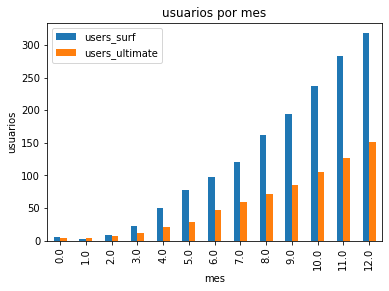

In [30]:
#calcular usuarios activos por mes
m_all.loc[m_all["duration_mins"] >= m_all["minutes_included"],"activ_user"]= m_all["duration_mins"]- m_all["minutes_included"]
m_all.loc[m_all["duration_mins"] < m_all["minutes_included"],"activ_user"]= 0

user_plan = m_all.pivot_table(index=['month'],
                              columns=['plan'],
                            values=['activ_user'], 
                            aggfunc=['count'] 
                            ).reset_index()

user_plan.columns = ['month', 'users_surf', 'users_ultimate']
print(user_plan)

user_plan.plot(kind = "bar", 
               x = "month",
               title = "usuarios por mes",
               xlabel = "mes",
               ylabel = "usuarios")


Esta tabla y gráfico se realizan para analizar cuantos usuarios fueron activos a lo largo de año, es decir que pagaron un valor a la empresa, así se puede determinar que durante a lo largo del año los usuarios fueron creciendo y el número de usuarios surf siempre superan a los usuarios ultimate.

### Llamadas

    month  calls_mins_surf  calls_mins_ultimate
0     1.0             6.43                 6.54
1     2.0             6.91                 6.52
2     3.0             6.70                 6.21
3     4.0             6.80                 6.66
4     5.0             6.77                 6.66
5     6.0             6.85                 6.71
6     7.0             6.72                 6.88
7     8.0             6.73                 6.61
8     9.0             6.73                 6.77
9    10.0             6.72                 6.67
10   11.0             6.76                 6.74
11   12.0             6.84                 6.67


<AxesSubplot:title={'center':'Duración de llamadas por mes'}, xlabel='mes', ylabel='duración promedio - mins'>

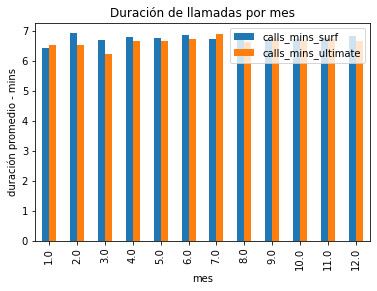

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_plan = pd.merge(df_calls, df_users, on="user_id", how="outer")

mean_mins = calls_plan.pivot_table(index=['month'],
                            columns=['plan'], 
                            values=['duration'], 
                            aggfunc=['mean'] 
                            ).reset_index()

mean_mins.columns = ['month', 'calls_mins_surf', 'calls_mins_ultimate']
mean_mins['calls_mins_surf'] = round(mean_mins['calls_mins_surf'],2)
mean_mins['calls_mins_ultimate'] = round(mean_mins['calls_mins_ultimate'],2)
print(mean_mins)

mean_mins.plot(kind = "bar", 
               x = "month",
               title = "Duración de llamadas por mes",
               xlabel = "mes",
               ylabel = "duración promedio - mins")


La duración de las llamadas entre planes no tiene una diferencia significativa, el tiempo promedio de llamada se encuentra entre 6 y 7 minutos

     month     surf  ultimate
0     1000      NaN    116.83
1     1001  1640.46       NaN
2     1002   777.13       NaN
3     1003  1041.00       NaN
4     1004  2618.95       NaN
..     ...      ...       ...
495   1495  1666.41       NaN
496   1496  1376.21       NaN
497   1497      NaN    276.53
498   1498  3029.97       NaN
499   1499  1450.31       NaN

[500 rows x 3 columns]


([<matplotlib.axis.XTick at 0x7f7dc40e8c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

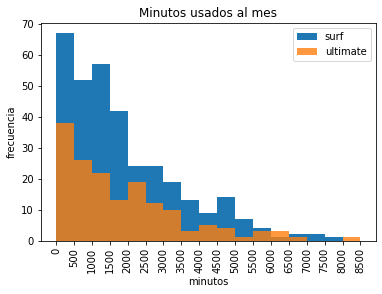

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
mins_per_user = calls_plan.pivot_table(index=['user_id'],
                            columns=['plan'], 
                            values=['duration'], 
                            aggfunc=['sum'] 
                            ).reset_index()
mins_per_user.columns = ['month', 'surf', 'ultimate']
print(mins_per_user)

intevalos = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500]
mins_per_user["surf"].plot(kind = "hist", bins = intevalos)
mins_per_user["ultimate"].plot(kind = "hist", bins = intevalos , alpha = 0.8)
plt.title("Minutos usados al mes")
plt.xlabel("minutos")
plt.ylabel("frecuencia")
plt.legend(["surf","ultimate"])
plt.xticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500], rotation='vertical')


Los usuarios del plan surf utilizan más el servicio de llamadas, sin embargo, tienen solo 500 min incluidos por lo que la mayoría tendrán que pagar más minutos extra

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_duration_surf = mins_per_user["surf"].mean().round(2) 
print("La media de llamadas en el plan surf es: ", mean_duration_surf)
mean_duration_ulti = mins_per_user["ultimate"].mean().round(2) 
print("La media de llamadas en el plan ultimate es: ", mean_duration_ulti)

print()

var_duration_surf = mins_per_user["surf"].var().round(2)  
print("La varianza de llamadas en el plan surf es: ", var_duration_surf)
var_duration_ulti = mins_per_user["ultimate"].var().round(2) 
print("La varianza de llamadas en el plan ultimate es: ", var_duration_ulti)

La media de llamadas en el plan surf es:  1878.15
La media de llamadas en el plan ultimate es:  1816.52

La varianza de llamadas en el plan surf es:  2653038.36
La varianza de llamadas en el plan ultimate es:  2592559.04


Estos parametros son similares: Las medias difieren en 3% de diferencia y las varianzas en 2.2%

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     339.000000
mean     1878.145251
std      1628.815017
min         0.000000
25%       620.075000
50%      1413.010000
75%      2732.580000
max      8950.280000
Name: surf, dtype: float64

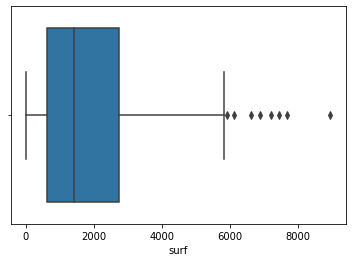

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(mins_per_user["surf"])
mins_per_user["surf"].describe()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     161.000000
mean     1816.515652
std      1610.142552
min         0.000000
25%       630.580000
50%      1279.240000
75%      2648.380000
max      8024.090000
Name: ultimate, dtype: float64

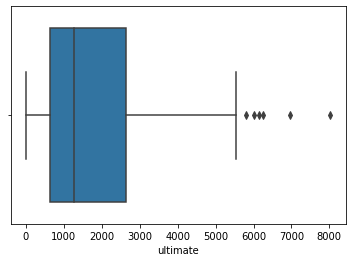

In [35]:
sns.boxplot(mins_per_user["ultimate"])
mins_per_user["ultimate"].describe()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

En realidad la estadística de la duración de las llamadas no difiere en los planes. Los usuarios se comportan de manera similar. Aunque se resalta que muchos usuarios surf pagan más minutos extra de lo incluido en el plan

### Mensajes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76149 entries, 0 to 76148
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76149 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  float64       
 4   first_name    76149 non-null  object        
 5   last_name     76149 non-null  object        
 6   age           76149 non-null  int64         
 7   city          76149 non-null  object        
 8   reg_date      76149 non-null  datetime64[ns]
 9   plan          76149 non-null  object        
 10  churn_date    4406 non-null   datetime64[ns]
 11  reg_month     76149 non-null  int64         
 12  churn_month   76149 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(3), object(5)
memory usage: 8.1+ MB
    month   surf  ultimate
0     1.0     21        62
1     

<AxesSubplot:title={'center':'Mensajes enviados por mes'}, xlabel='mes', ylabel='mensajes'>

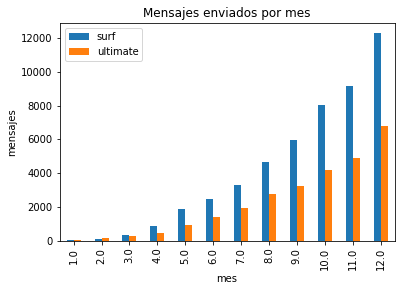

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mess_plan = pd.merge(df_messages, df_users, on="user_id", how="outer")
mess_plan.info()

count_mess = mess_plan.pivot_table(index=['month'],
                            columns=['plan'], 
                            values=['message_date'], 
                            aggfunc=['count']
                            ).reset_index()
count_mess.columns = ['month', 'surf', 'ultimate']
print(count_mess)

count_mess.plot(kind = "bar", 
                x = "month",
               title = "Mensajes enviados por mes",
               xlabel = "mes",
               ylabel = "mensajes")


Los usuarios del plan surf envian más mensajes que los usuarios del plan ultimate

     month   surf  ultimate
0     1000    NaN      11.0
1     1001  207.0       NaN
2     1002   88.0       NaN
3     1003   50.0       NaN
4     1004  177.0       NaN
..     ...    ...       ...
495   1495    0.0       NaN
496   1496   65.0       NaN
497   1497    NaN      50.0
498   1498    0.0       NaN
499   1499    0.0       NaN

[500 rows x 3 columns]


([<matplotlib.axis.XTick at 0x7f7dc3eced30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

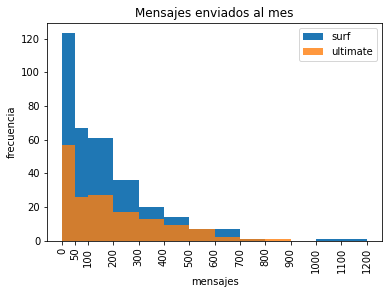

In [37]:
mess_per_user = mess_plan.pivot_table(index=['user_id'],
                            columns=['plan'], 
                            values=['message_date'], 
                            aggfunc=['count'] 
                            ).reset_index()
mess_per_user.columns = ['month', 'surf', 'ultimate']
print(mess_per_user)

mess_per_user["surf"].plot(kind = "hist", bins = [0,50,100,200,300,400,500,600,700,800,900,1000,1100,1200], alpha = 1)
mess_per_user["ultimate"].plot(kind = "hist", bins = [0,50,100,200,300,400,500,600,700,800,900,1000,1100,1200], alpha = 0.8)
plt.title("Mensajes enviados al mes")
plt.xlabel("mensajes")
plt.ylabel("frecuencia")
plt.legend(["surf","ultimate"])
plt.xticks([0,50,100,200,300,400,500,600,700,800,900,1000,1100,1200],rotation='vertical')


Una vez más los usuarios surf envían más mensajes de los que tienen incluidos en su plan (50), es decir que la mayoría pagará mensajes extra

In [38]:
mean_mess_surf = mess_per_user["surf"].mean().round(2) 
print("La media de mensajes en el plan surf es: ", mean_mess_surf)
mean_mess_ulti = mess_per_user["ultimate"].mean().round(2) 
print("La media de mensajes en el plan ultimate es: ", mean_mess_ulti)

print()

var_mess_surf = mess_per_user["surf"].var().round(2)  
print("La varianza de mensajes en el plan surf es: ", var_mess_surf)
var_mess_ulti = mess_per_user["ultimate"].var().round(2) 
print("La varianza de mensajes en el plan ultimate es: ", var_mess_ulti)

La media de mensajes en el plan surf es:  144.58
La media de mensajes en el plan ultimate es:  167.93

La varianza de mensajes en el plan surf es:  33340.55
La varianza de mensajes en el plan ultimate es:  39411.44


Las estadísticas en los mensajes difieren, la media difiere 15% y la varianza 18%. Es decir que los usuarios srf envían 15% más mensajes que los usuarios ultimate

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     339.000000
mean      144.584071
std       182.593936
min         0.000000
25%        11.000000
50%        81.000000
75%       208.500000
max      1233.000000
Name: surf, dtype: float64

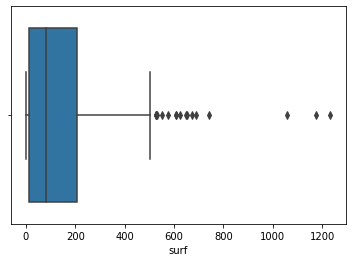

In [39]:
sns.boxplot(mess_per_user["surf"])
mess_per_user["surf"].describe()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     161.000000
mean      167.931677
std       198.523145
min         0.000000
25%        17.000000
50%        96.000000
75%       244.000000
max      1288.000000
Name: ultimate, dtype: float64

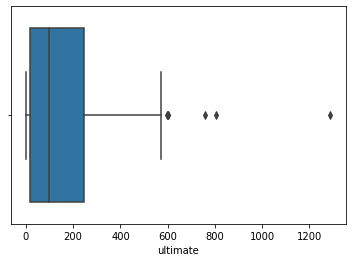

In [40]:
sns.boxplot(mess_per_user["ultimate"])
mess_per_user["ultimate"].describe()

Si comparamos las diferencias entre medianas, se observa que los usuarios surf enviar 81 mensajes mientras que los usuarios ultimate mandan 96 (18% más que los surf)

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104836 entries, 0 to 104835
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104836 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  float64       
 5   gb_used       104825 non-null  float64       
 6   first_name    104836 non-null  object        
 7   last_name     104836 non-null  object        
 8   age           104836 non-null  int64         
 9   city          104836 non-null  object        
 10  reg_date      104836 non-null  datetime64[ns]
 11  plan          104836 non-null  object        
 12  churn_date    7468 non-null    datetime64[ns]
 13  reg_month     104836 non-null  int64         
 14  churn_month   104836 non-null  float64       
dtypes: datetime64[ns]

<AxesSubplot:title={'center':'gbs usados por mes'}, xlabel='mes', ylabel='gbs'>

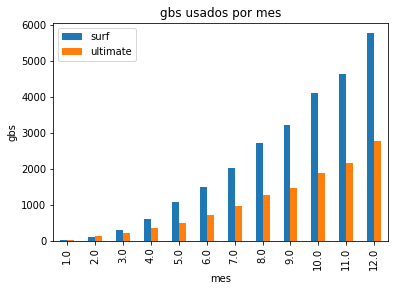

In [41]:
inte_plan = pd.merge(df_internet, df_users, on="user_id", how="outer")
inte_plan.info()

sum_inte= inte_plan.pivot_table(index=['month'],
                            columns=['plan'], 
                            values=['gb_used'], 
                            aggfunc=['sum']
                            ).reset_index()
sum_inte.columns = ['month', 'surf', 'ultimate']
print(sum_inte)

sum_inte.plot(kind = "bar", 
              x = "month",
               title = "gbs usados por mes",
               xlabel = "mes",
               ylabel = "gbs")


Una vez más los usuarios surf usan más gbs del servicio de internet

     month    surf  ultimate
0     1000     NaN       1.9
1     1001   80.37       NaN
2     1002   40.31       NaN
3     1003   27.05       NaN
4     1004  156.38       NaN
..     ...     ...       ...
495   1495   98.91       NaN
496   1496   64.26       NaN
497   1497     NaN      11.1
498   1498  227.52       NaN
499   1499   71.32       NaN

[500 rows x 3 columns]


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

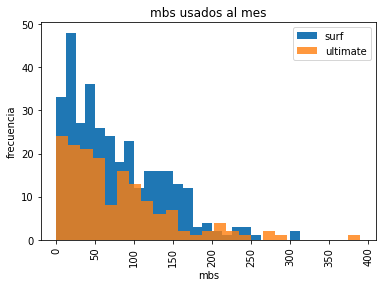

In [42]:
inte_per_user = inte_plan.pivot_table(index=['user_id'],
                            columns=['plan'], 
                            values=['gb_used'], 
                            aggfunc=['sum']
                            ).reset_index()
inte_per_user.columns = ['month', 'surf', 'ultimate']
print(inte_per_user)

inte_per_user["surf"].plot(kind = "hist", bins = 25, alpha = 1)
inte_per_user["ultimate"].plot(kind = "hist", bins = 25, alpha = 0.8)
plt.title("mbs usados al mes")
plt.xlabel("mbs")
plt.ylabel("frecuencia")
plt.legend(["surf","ultimate"])
plt.xticks(rotation='vertical')

En este caso el histograma nos dice que los usuarios se comprotan de manera similar en el uso de internet

In [43]:
mean_inte_surf = inte_per_user["surf"].mean().round(2) 
print("La media de mbs usados en el plan surf es: ", mean_inte_surf)
mean_inte_ulti = inte_per_user["ultimate"].mean().round(2) 
print("La media de mbs usados en el plan ultimate es: ", mean_inte_ulti)

print()

var_inte_surf = inte_per_user["surf"].var().round(2)  
print("La varianza de mbs usados en el plan surf es: ", var_inte_surf)
var_inte_ulti = inte_per_user["ultimate"].var().round(2) 
print("La varianza de mbs usados en el plan ultimate es: ", var_inte_ulti)

La media de mbs usados en el plan surf es:  76.83
La media de mbs usados en el plan ultimate es:  76.98

La varianza de mbs usados en el plan surf es:  3620.39
La varianza de mbs usados en el plan ultimate es:  4469.55


La media de los msb usados es similar, sin embargo el comportamiento de los usuarios es más disperso en los ultimate

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    339.000000
mean      76.834779
std       60.169675
min        0.000000
25%       28.235000
50%       62.240000
75%      116.950000
max      312.510000
Name: surf, dtype: float64

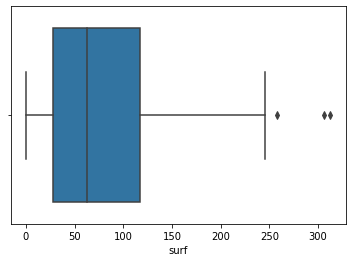

In [44]:
sns.boxplot(inte_per_user["surf"])
inte_per_user["surf"].describe()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    161.000000
mean      76.984348
std       66.854689
min        0.000000
25%       25.070000
50%       58.600000
75%      106.570000
max      390.110000
Name: ultimate, dtype: float64

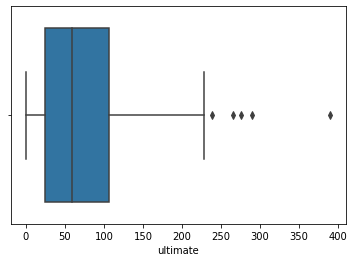

In [45]:
sns.boxplot(inte_per_user["ultimate"])
inte_per_user["ultimate"].describe()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Estadísticamente el comportamiento de los usuarios en el uso de internet es similar, según la mediana. Pero en comparación a los gráficos, los usuarios surf usan más gb.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

    month      surf  ultimate
0     0.0      0.00       0.0
1     1.0     40.00     280.0
2     2.0    319.57     490.0
3     3.0   1066.65     896.0
4     4.0   2065.53    1540.0
5     5.0   3717.37    2051.0
6     6.0   4809.80    3367.0
7     7.0   7713.56    4249.0
8     8.0  10526.85    5173.0
9     9.0  11444.67    6195.0
10   10.0  15664.83    7665.0
11   11.0  16635.21    9121.0
12   12.0  22657.14   11088.0


<AxesSubplot:title={'center':'Ingresos por mes'}, xlabel='mes', ylabel='usd'>

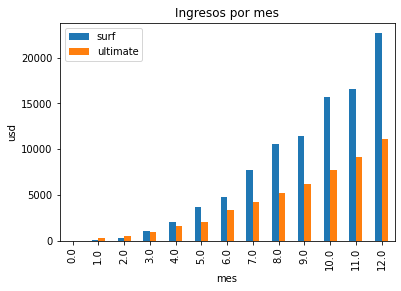

In [46]:
ing_plan= df_ing.pivot_table(index=['month'],
                            columns=['plan'], 
                            values=['ing'], 
                            aggfunc=['sum']
                            ).reset_index()
ing_plan.columns = ['month', 'surf', 'ultimate']
print(ing_plan)

ing_plan.plot(kind = "bar", 
              x = "month",
               title = "Ingresos por mes",
               xlabel = "mes",
               ylabel = "usd")

Los usuarios surf son quienes proveen de los ingresos a la empresa. Probablemente se deba a que deben pagar más por minutos, mensajes y gb extra.

     month    surf  ultimate
0     1000     NaN      70.0
1     1001  260.09       NaN
2     1002  100.00       NaN
3     1003  158.12       NaN
4     1004  630.00       NaN
..     ...     ...       ...
495   1495  473.30       NaN
496   1496  140.00       NaN
497   1497     NaN      70.0
498   1498  860.00       NaN
499   1499  220.00       NaN

[500 rows x 3 columns]


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

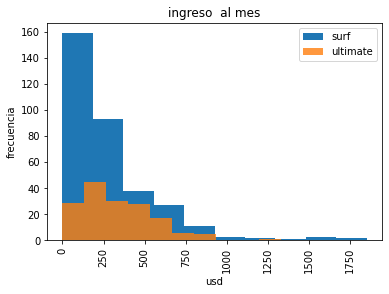

In [47]:
ing_per_user = df_ing.pivot_table(index=['user_id'],
                            columns=['plan'], 
                            values=['ing'], 
                            aggfunc=['sum'] ,
                            ).reset_index()
ing_per_user.columns = ['month', 'surf', 'ultimate']
print(ing_per_user)

ing_per_user["surf"].plot(kind='hist') 
ing_per_user["ultimate"].plot(kind='hist', alpha = 0.8) 
plt.title("ingreso  al mes")
plt.xlabel("usd")
plt.ylabel("frecuencia")
plt.legend(["surf","ultimate"])
plt.xticks(rotation='vertical')


La distribución en los histogramas muestran que el ingreso de surf por cada usuario se encuentra entre 0 y 1000 usd, mientras que los usuarios ultimate pagan de 0 hasta 800 usd

In [48]:
mean_ing_surf = ing_per_user["surf"].mean().round(2) 
print("La media de ingresos en el plan surf es: ", mean_ing_surf)
mean_ing_ulti = ing_per_user["ultimate"].mean().round(2) 
print("La media de ingresos en el plan ultimate es: ", mean_ing_ulti)

print()

var_ing_surf = ing_per_user["surf"].var().round(2)  
print("La varianza de ingresos en el plan surf es: ", var_ing_surf)
var_ing_ulti = ing_per_user["ultimate"].var().round(2) 
print("La varianza de ingresos en el plan ultimate es: ", var_ing_ulti)

La media de ingresos en el plan surf es:  285.14
La media de ingresos en el plan ultimate es:  323.7

La varianza de ingresos en el plan surf es:  87181.85
La varianza de ingresos en el plan ultimate es:  52040.31


La difenrencia de ingresos es notable, los usuarios ultimate pagan alrededor del 60% más que los usuarios surf. la varianza es diferente entre planes, el pago de los usuarios surf son más dispersos que los usuarios ultimate

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     339.000000
mean      285.136224
std       295.265727
min         0.000000
25%        81.735000
50%       200.000000
75%       378.320000
max      1850.860000
Name: surf, dtype: float64

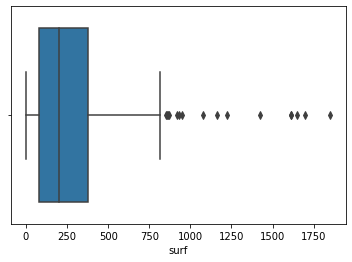

In [49]:
sns.boxplot(ing_per_user["surf"])
ing_per_user["surf"].describe()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     161.000000
mean      323.695652
std       228.123460
min         0.000000
25%       140.000000
50%       280.000000
75%       490.000000
max      1330.000000
Name: ultimate, dtype: float64

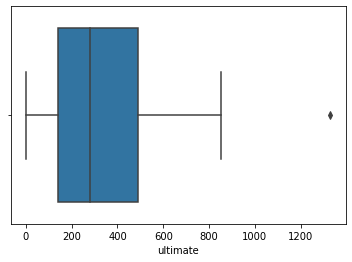

In [50]:
sns.boxplot(ing_per_user["ultimate"])
ing_per_user["ultimate"].describe()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
Existen diferencias notables frente a los ingresos,  los usuarios surf pagan 200 usd como mediana de acuerdo al diagrama de caja, al contrario los usuarios ultimate que pagan 285 usd. Los mayores ingresos para la operadora telefónica provienen de sus usuarios surf, porque el número de usuarios es mucho mayor.

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te recomiendo obtener estadística descriptiva de cada partida (llamadas, mensajes, internet) e ingresos por plan (media, mediana, moda, desviación típica, varianza) para identificar la distribución de los datos y algunos hallazgos antes de pasar a las pruebas de hipótesis.

</div>

## Prueba las hipótesis estadísticas

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, es muy buena prática eliminar valores atipicos que puedan sesgar nuestros resultados. En este caso elaminar estos valores puedes ser útiles para tener una mejor respuesta de las pruebas de hipóstesis sobre si son iguales o diferentes los ingresos promedios de los usuarios de ambos planes y de los ingresos promedio de los usuarios del área NY-NJ.

</div>

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis nula: Los ingresos del plan surf no son iguales a los ingresos del plan ultimate
Hipótesis alternativa: Los ingresos del plan surf son iguales a los ingresos del plan ultimate

Se aplica la prueba estadística "Hipótesis sobre la igualdad de las medias de dos poblaciones"
alpha = 5%
la varianza entre poblaciones es diferente

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count     339.000000
mean      285.136224
std       295.265727
min         0.000000
25%        81.735000
50%       200.000000
75%       378.320000
max      1850.860000
Name: surf, dtype: float64

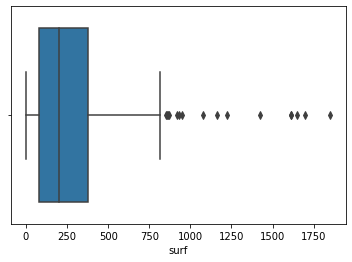

In [51]:
ing_surf = pd.DataFrame
ing_surf = ing_per_user["surf"]
ing_surf = ing_surf.dropna()
sns.boxplot(ing_surf)
ing_surf.describe()

In [52]:
# CORRECCION VALORES ATIPICOS
print ("El número de datos de ing_surf es:", len(ing_surf))
print()
# Calcular pencentiles
cuartil3 = ing_surf.quantile(0.75)
cuartil1 = ing_surf.quantile(0.25)

# Calcular IQR
iqr = cuartil3 - cuartil1

# Límites upper y lower
upper = cuartil3 + (1.5 * iqr)
lower = cuartil1 - (1.5 * iqr)

#Eliminar outliers
corr_ing_surf = ing_surf.where((ing_surf > lower) & (ing_surf < upper), None)
corr_ing_surf = corr_ing_surf.dropna()
print ("El número de datos de corr_ing_surf es:", len(corr_ing_surf))


El número de datos de ing_surf es: 339

El número de datos de corr_ing_surf es: 323


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0       70.0
6      154.0
8      210.0
11     490.0
13      70.0
       ...  
482    210.0
487     70.0
490    686.0
493    350.0
497     70.0
Name: ultimate, Length: 161, dtype: float64



count     161.000000
mean      323.695652
std       228.123460
min         0.000000
25%       140.000000
50%       280.000000
75%       490.000000
max      1330.000000
Name: ultimate, dtype: float64

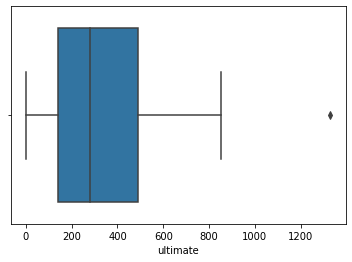

In [53]:
ing_ultimate = pd.DataFrame
ing_ultimate = ing_per_user["ultimate"]
ing_ultimate = ing_ultimate.dropna()
print(ing_ultimate)
print()
sns.boxplot(ing_ultimate)
ing_ultimate.describe()

In [54]:
# CORRECCION VALORES ATIPICOS
print ("El número de datos de ing_ultimate es:", len(ing_ultimate))
print()

# Calcular pencentiles
cuartil3_ult = ing_ultimate.quantile(0.75)
cuartil1_ult = ing_ultimate.quantile(0.25)

# Calcular IQR
iqr_ult = cuartil3_ult - cuartil1_ult

# Límites upper y lower
upper_ult = cuartil3_ult + (1.5 * iqr_ult)
lower_ult = cuartil1_ult - (1.5 * iqr_ult)

#Eliminar outliers
corr_ing_ult = ing_ultimate.where((ing_ultimate > lower_ult) & (ing_ultimate < upper_ult), None)
corr_ing_ult = corr_ing_ult.dropna()
print ("El número de datos de corr_ing_ultimate es:", len(corr_ing_ult))
print()


El número de datos de ing_ultimate es: 161

El número de datos de corr_ing_ultimate es: 160



In [55]:
#levene
levene_stat, p_value = st.levene(corr_ing_surf, corr_ing_ult)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

Levene's test statistic: 3.063233853772284
p-value: 0.08071973550080562
No hay evidencia suficiente que sugiera que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.



In [56]:
# Prueba las hipótesis
alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

results = scipy.stats.ttest_ind(corr_ing_surf, corr_ing_ult, equal_var = True) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  7.823542244352279e-05
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen uso de las pruebas de hipótesis, pero qué conclusiones podríamos identificar de ambas pruebas?  
</div>

El valor p nos dice que aunque los ingresos promedio para los dos canales son diferentes, existe un 0.1% de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Se rechaza la hipótesis de que los ingresos no son iguales, entonces son similares.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]
Si es diferente

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis nula: Los ingresos de los usuarios en NYNJ no son iguales a los ingresos de los usuarios fuera de NYNJ

Hipótesis alternativa: Los ingresos de los usuarios en NYNJ son iguales a los ingresos de los usuarios fuera de NYNJ

Se aplica la prueba estadística "Hipótesis sobre la igualdad de las medias de dos poblaciones"
alpha = 5%
la varianza entre poblaciones es diferente

In [57]:
#crear las series
users_ing = pd.merge(df_ing, df_users, on=["user_id","plan"], how="outer")
users_ing = users_ing.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'churn_month', 'reg_month'], axis=1)
users_ing = users_ing.fillna(0)
users_ing = users_ing.pivot_table(index=["user_id","plan","month","city"],
                                  values=['ing'], 
                            aggfunc=['sum'] ,
                            ).reset_index()
users_ing.columns = ["user_id","plan","month","city","total_ing"]
print(users_ing)
print()                             


      user_id      plan  month                                       city  \
0        1000  ultimate   12.0      Atlanta-Sandy Springs-Roswell, GA MSA   
1        1001      surf    8.0            Seattle-Tacoma-Bellevue, WA MSA   
2        1001      surf    9.0            Seattle-Tacoma-Bellevue, WA MSA   
3        1001      surf   10.0            Seattle-Tacoma-Bellevue, WA MSA   
4        1001      surf   11.0            Seattle-Tacoma-Bellevue, WA MSA   
...       ...       ...    ...                                        ...   
2298     1498      surf   12.0  New York-Newark-Jersey City, NY-NJ-PA MSA   
2299     1499      surf    9.0          Orlando-Kissimmee-Sanford, FL MSA   
2300     1499      surf   10.0          Orlando-Kissimmee-Sanford, FL MSA   
2301     1499      surf   11.0          Orlando-Kissimmee-Sanford, FL MSA   
2302     1499      surf   12.0          Orlando-Kissimmee-Sanford, FL MSA   

      total_ing  
0         70.00  
1         20.00  
2         20.00  
3  

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_ing'>

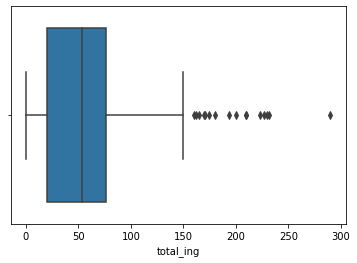

In [58]:
NYNJ_ing = users_ing[users_ing['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]

NYNJ_ing["total_ing"].describe()
print()
sns.boxplot(NYNJ_ing["total_ing"])

In [59]:
# CORRECCION VALORES ATIPICOS
NYNJ_t_ing = NYNJ_ing["total_ing"]
print ("El número de datos de NYNJ_t_ing es:", len(NYNJ_t_ing))
print()

# Calcular pencentiles
cuartil3_NYNJ = NYNJ_t_ing.quantile(0.75)
cuartil1_NYNJ = NYNJ_t_ing.quantile(0.25)

# Calcular IQR
iqr_NYNJ = cuartil3_NYNJ - cuartil1_NYNJ

# Límites upper y lower
upper_NYNJ = cuartil3_NYNJ + (1.5 * iqr_NYNJ)
lower_NYNJ = cuartil1_NYNJ - (1.5 * iqr_NYNJ)

#Eliminar outliers
corr_NYNJ_t_ing = NYNJ_t_ing.where((NYNJ_t_ing > lower_NYNJ) & (NYNJ_t_ing < upper_NYNJ), None)
corr_NYNJ_t_ing = corr_NYNJ_t_ing.dropna()
print ("El número de datos de corr_NYNJ_t_ing es:", len(corr_NYNJ_t_ing))
print()


El número de datos de NYNJ_t_ing es: 378

El número de datos de corr_NYNJ_t_ing es: 362



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 2302
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1925 non-null   int64  
 1   plan       1925 non-null   object 
 2   month      1925 non-null   float64
 3   city       1925 non-null   object 
 4   total_ing  1925 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 90.2+ KB



/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_ing'>

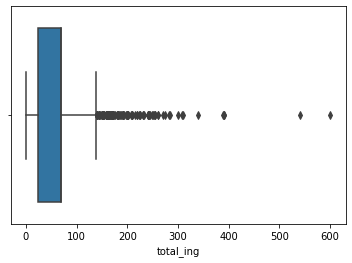

In [60]:
No_NYNJ_ing = users_ing[~users_ing['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]
No_NYNJ_ing.info()
print()
No_NYNJ_ing["total_ing"].describe()
sns.boxplot(No_NYNJ_ing["total_ing"])

In [61]:
# CORRECCION VALORES ATIPICOS
No_NYNJ_t_ing = No_NYNJ_ing["total_ing"]
print ("El número de datos de No_NYNJ_t_ing es:", len(No_NYNJ_t_ing))
print()

# Calcular pencentiles
cuartil3_No_NYNJ = No_NYNJ_t_ing.quantile(0.75)
cuartil1_No_NYNJ = No_NYNJ_t_ing.quantile(0.25)

# Calcular IQR
iqr_No_NYNJ = cuartil3_No_NYNJ - cuartil1_No_NYNJ

# Límites upper y lower
upper_No_NYNJ = cuartil3_No_NYNJ + (1.5 * iqr_No_NYNJ)
lower_No_NYNJ = cuartil1_No_NYNJ - (1.5 * iqr_No_NYNJ)

#Eliminar outliers
corr_No_NYNJ_t_ing = No_NYNJ_t_ing.where((No_NYNJ_t_ing > lower_No_NYNJ) & (No_NYNJ_t_ing < upper_No_NYNJ), None)
corr_No_NYNJ_t_ing = corr_No_NYNJ_t_ing.dropna()
print ("El número de datos de corr_No_NYNJ_t_ing es:", len(corr_No_NYNJ_t_ing))
print()

El número de datos de No_NYNJ_t_ing es: 1925

El número de datos de corr_No_NYNJ_t_ing es: 1805



In [62]:
#levene
levene_stat, p_value = st.levene(corr_NYNJ_t_ing, corr_No_NYNJ_t_ing)

print("Levene's test statistic:", levene_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hay evidencia suficiente que sugiere que las varianzas son significativamente diferentes.")
else:
    print("No hay evidencia suficiente que sugiere que las varianzas son significativamente diferentes. Las varianzas son probablemente similares.")

print()

Levene's test statistic: 14.537565973338769
p-value: 0.00014123276156426367
Hay evidencia suficiente que sugiere que las varianzas son significativamente diferentes.



In [63]:
# Prueba las hipótesis

alpha = 0.05  # el nivel de significancia estadística crítica

# si el valor p es menor que alpha, rechazamos la hipótesis

results = scipy.stats.ttest_ind(corr_NYNJ_t_ing, corr_No_NYNJ_t_ing, equal_var = False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 


valor p:  0.23105896847161786
No podemos rechazar la hipótesis nula


 Este resultado de p nos dice que los ingresos de los usuarios en NYNJ no son iguales a los ingresos de los usuarios fuera de NYNJ. Es decir que se tratan como ingresos diferentes.

 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estra pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los planes y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(surf_filtered['monthly_income'], ultimate_filtered['monthly_income'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, aceptaremos la hipótesis nula, y si es menor a 0.05, aceptaremos la hipótesis alternativa, indicando que las varianzas no son iguales.    
</div>



<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo verificar esta segunda prueba de hipótesis. Este resultado puede cambiar cuando hagamos los ajustes que te comento a lo largo del código. 
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

+ El comportamiento de los usuarios en el uso de los servicios de llamadas, mensajes e internet es similar entre planes, sin embargo los cargos extra hace que los usuarios surf terminen pagando más por el servicio que los usuarios ultimate.
+ Por otro lado un factor importante es el número de usuarios de cada plan, los usuarios surf producen más ingresos porque son más que los usuarios ultimate
+ La distribución geográfica de los usuarios influye de alguna manera en los ingresos
+ Metodológicamente es necesario eliminar los datos atípicos antes de las pruebas de hipótesis ya que la media siempre se ve influenciada por estos datos atípicos
+ Para obtener mayores ingresos, la empresa telefónica puede atraer a más usuarios surf, teniendo en cuenta las mismas pautas de comportamiento general de los usuarios



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos
    
    
*  verificar que redondeamos las variables antes de hacer la agrupación por usuario
    
*  verificar que hacemos la transformación de megabytes a gigabytes
    
*  Cuando hacemos la agrupación de los datos, considerar agregar la variable de mes para que los análisis posteriores sean más sencillos e intuitivos de realizar
    
*  verificar la segunda prueba de hipótesis
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buen trabajo con el ajuste a los pequeños puntos que necesitaban trabajarse. 
</div>